In [1]:
%load_ext autoreload
%autoreload 2
import utils
from chessboard_detection import *
import logging
import sys
from common import *

In [2]:
H, W = 7, 9

In [3]:
LOGGER = logging.getLogger()
LOGGER.setLevel(logging.DEBUG)
LOGGER.addHandler(logging.StreamHandler(stream=sys.stdout))

In [4]:
images = utils.read_images('chessboard_patterns/calibration-23.png')
image = images[0]

Harris corner detector found 2078 corners


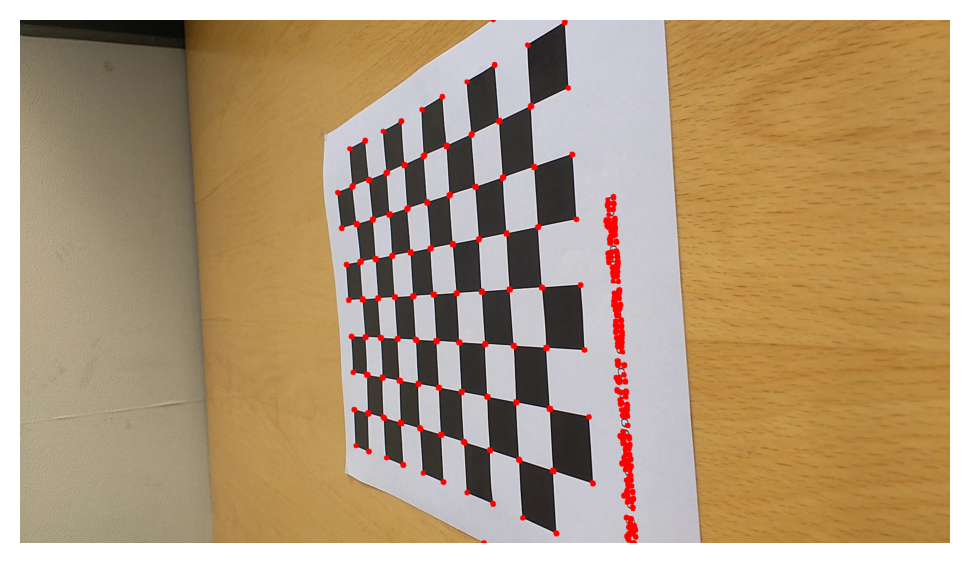

In [5]:
corners = harris_corner(image)
utils.visualize_keypoints(image, corners)

Clustering filter: 2078->194 corners


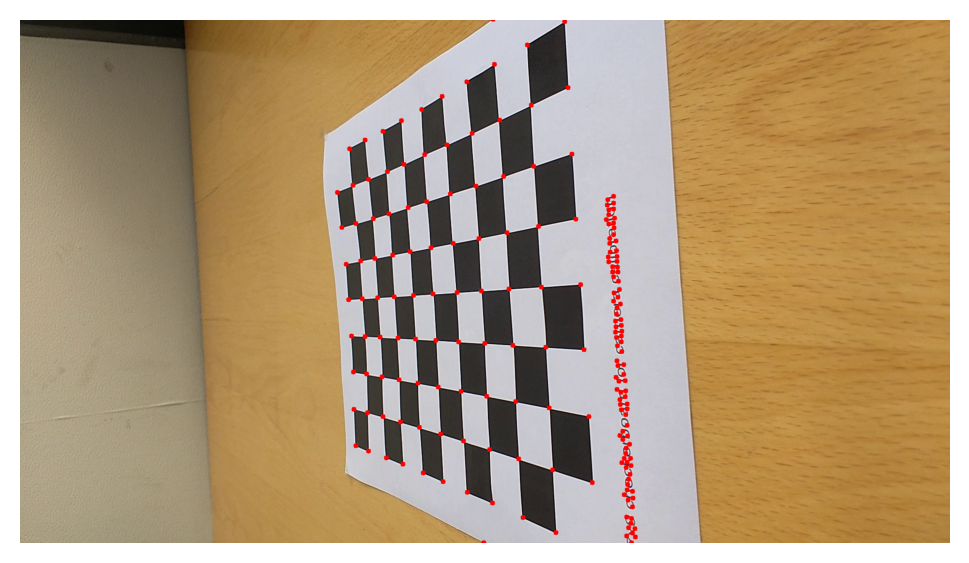

In [6]:
corners = clustering_filter(corners)
utils.visualize_keypoints(image, corners)

Connected component filter: 194->99 corners


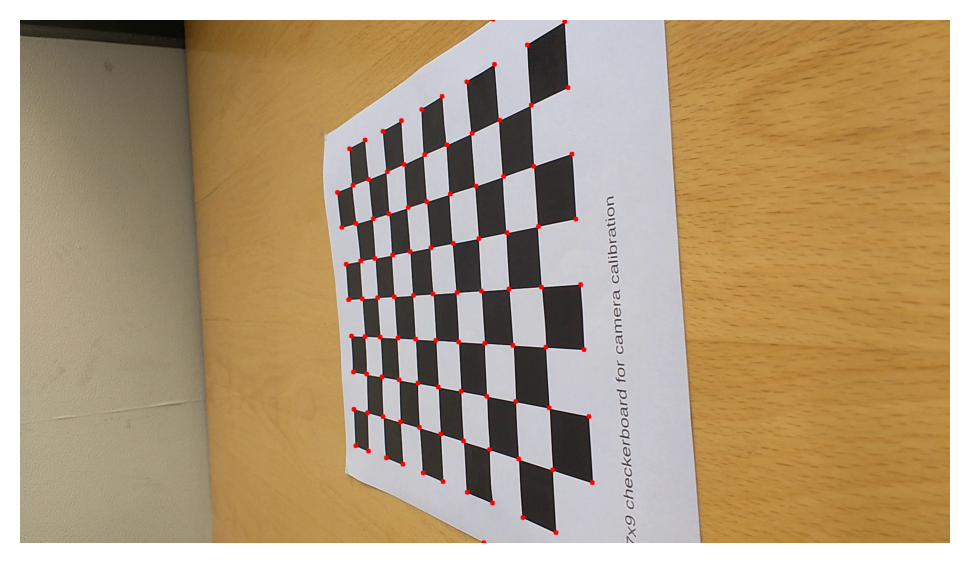

In [7]:
corners = connected_component_filter(corners)
utils.visualize_keypoints(image, corners)

Square response filter: 99->63 corners


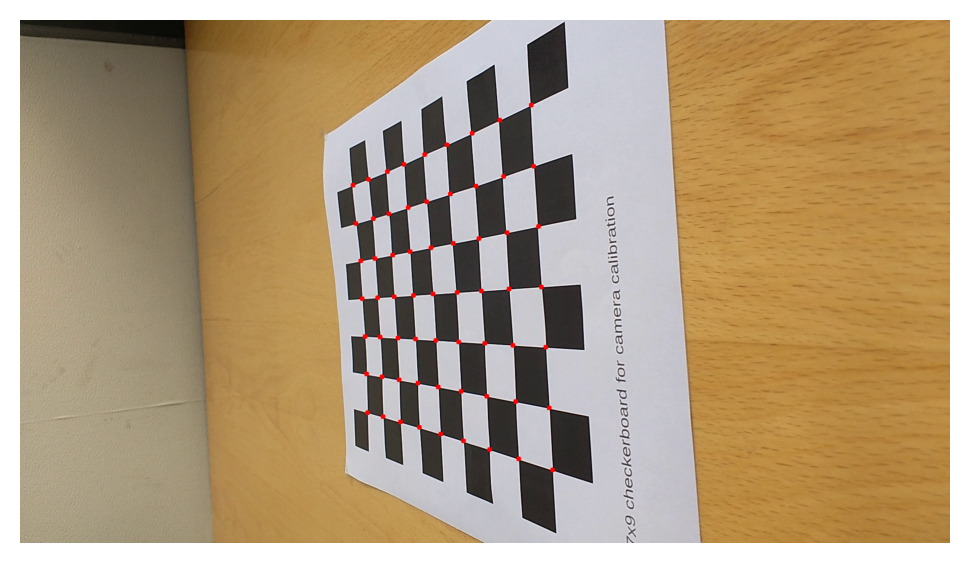

In [8]:
square_response_filter = SquareResponseFilter()
corners = square_response_filter.filter(image, corners)
utils.visualize_keypoints(image, corners)

In [9]:
# if len(corners) != w * h:
#     return False

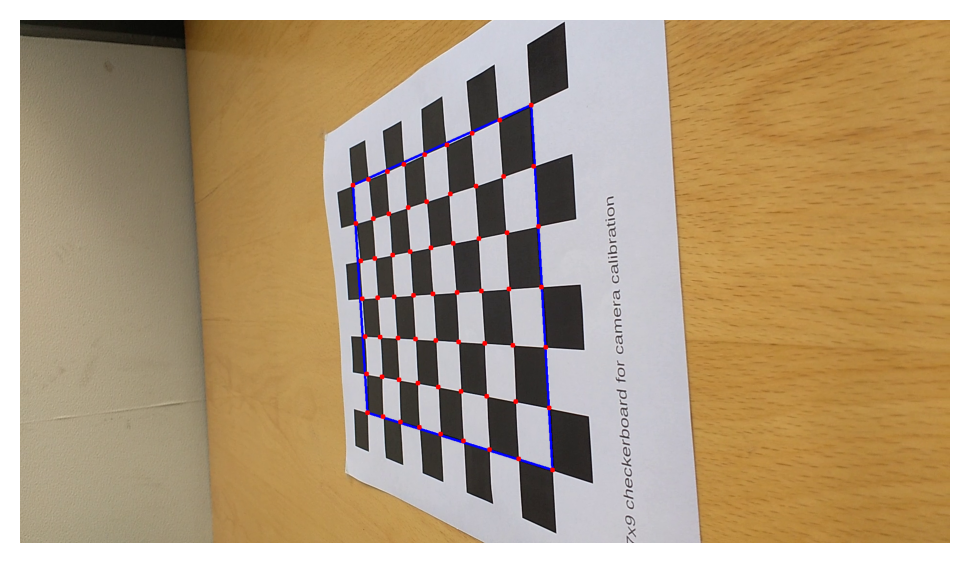

In [10]:
quad = approx_quadrilateral_hull(corners)
utils.visualize_hull(image, quad, corners)

Chessboard successfully filled!


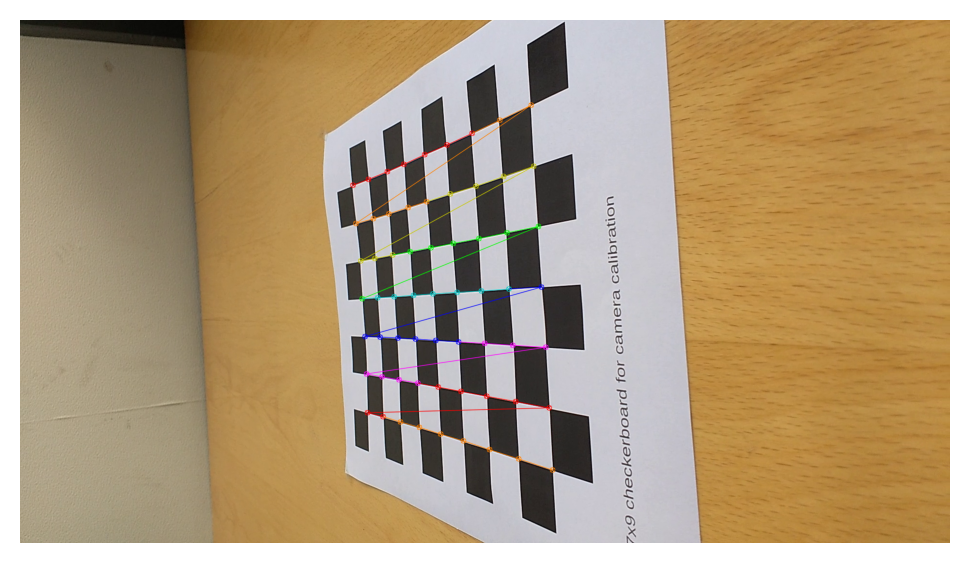

In [11]:
chessboard_filler = ChessboardFiller((H, W), corners, quad)
chessboard_filler.fill()
corners = chessboard_filler.get()
utils.visualize_chessboard(image, (H, W), corners)